In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df = pd.read_csv('old_contact_network.csv')

In [3]:
df

,Time,Person 1,Person 2,Class1,Class2
0,31220,1558,1567,3B,3B
1,31220,1560,1570,3B,3B
2,31220,1567,1574,3B,3B
3,31220,1632,1818,4B,4B
4,31220,1632,1866,4B,4B
...,...,...,...,...,...
125768,148120,1752,1783,1A,1A
125769,148120,1752,1789,1A,1A
125770,148120,1775,1798,1A,1A
125771,148120,1783,1796,1A,1A


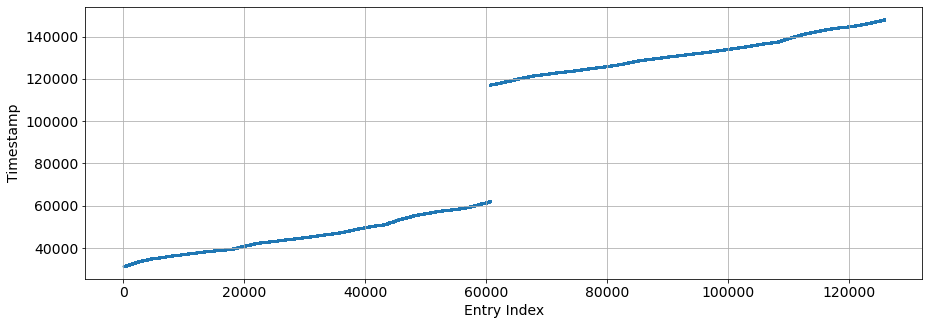

In [4]:
plt.grid()
plt.ylabel('Timestamp')
plt.xlabel('Entry Index')
plt.scatter(df.index, df.Time, s = 1)
plt.show()

In [5]:
unique_timestamps = list(set(df.Time))
unique_timestamps.sort()

gaps = defaultdict(int)

for i in range(len(unique_timestamps) - 1):
    gaps[unique_timestamps[i + 1] - unique_timestamps[i]] += 1

print(gaps)

defaultdict(<class 'int'>, {20: 3098, 54940: 1})


In [6]:
correct_gap = 20
offset = 54940 - correct_gap

for index in range(1, df.shape[0]):
    if df.Time[index] - df.Time[index-1] > correct_gap:
        df.at[index, 'Time'] -= offset

In [7]:
unique_timestamps = list(set(df.Time))
unique_timestamps.sort()

gaps = defaultdict(int)

for i in range(len(unique_timestamps)-1):
    gaps[unique_timestamps[i + 1] - unique_timestamps[i]] += 1

print(gaps)

defaultdict(<class 'int'>, {20: 3099})


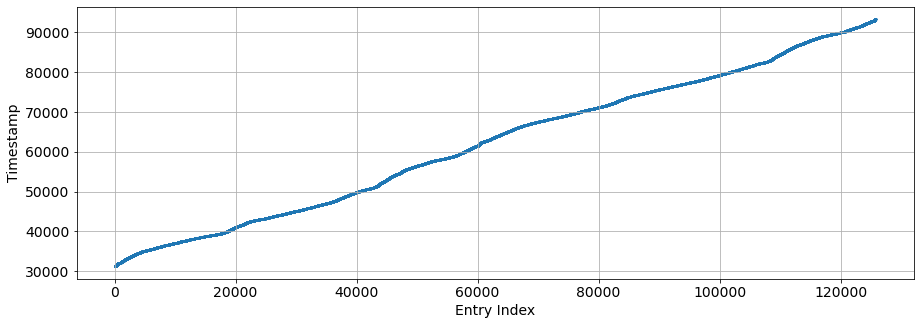

In [8]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14

plt.grid()
plt.ylabel('Timestamp')
plt.xlabel('Entry Index')
plt.scatter(df.index, df.Time, s = 1)
plt.show()

In [9]:
df.to_csv('contact_network.csv', index = False)